In [1]:
#import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data = pd.read_excel('HR_comma_sep.xlsx')
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [17]:
from sklearn.preprocessing import LabelEncoder
le_sales = LabelEncoder()
le_salary = LabelEncoder()

In [19]:
data['Sales'] = le_sales.fit_transform(data['sales'])
data['Salary'] = le_salary.fit_transform(data['salary'])

In [20]:
data=data.drop(['sales','salary'],axis='columns')

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales,Salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# Performing EDA

In [23]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales,Salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


<Axes: >

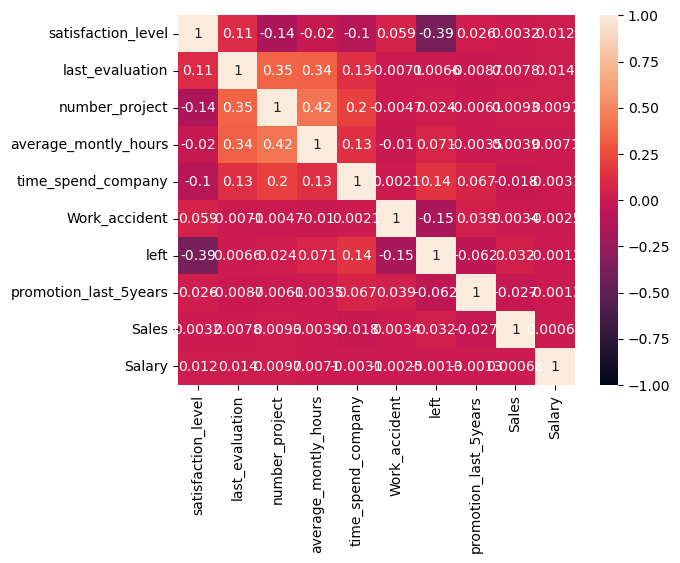

In [24]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

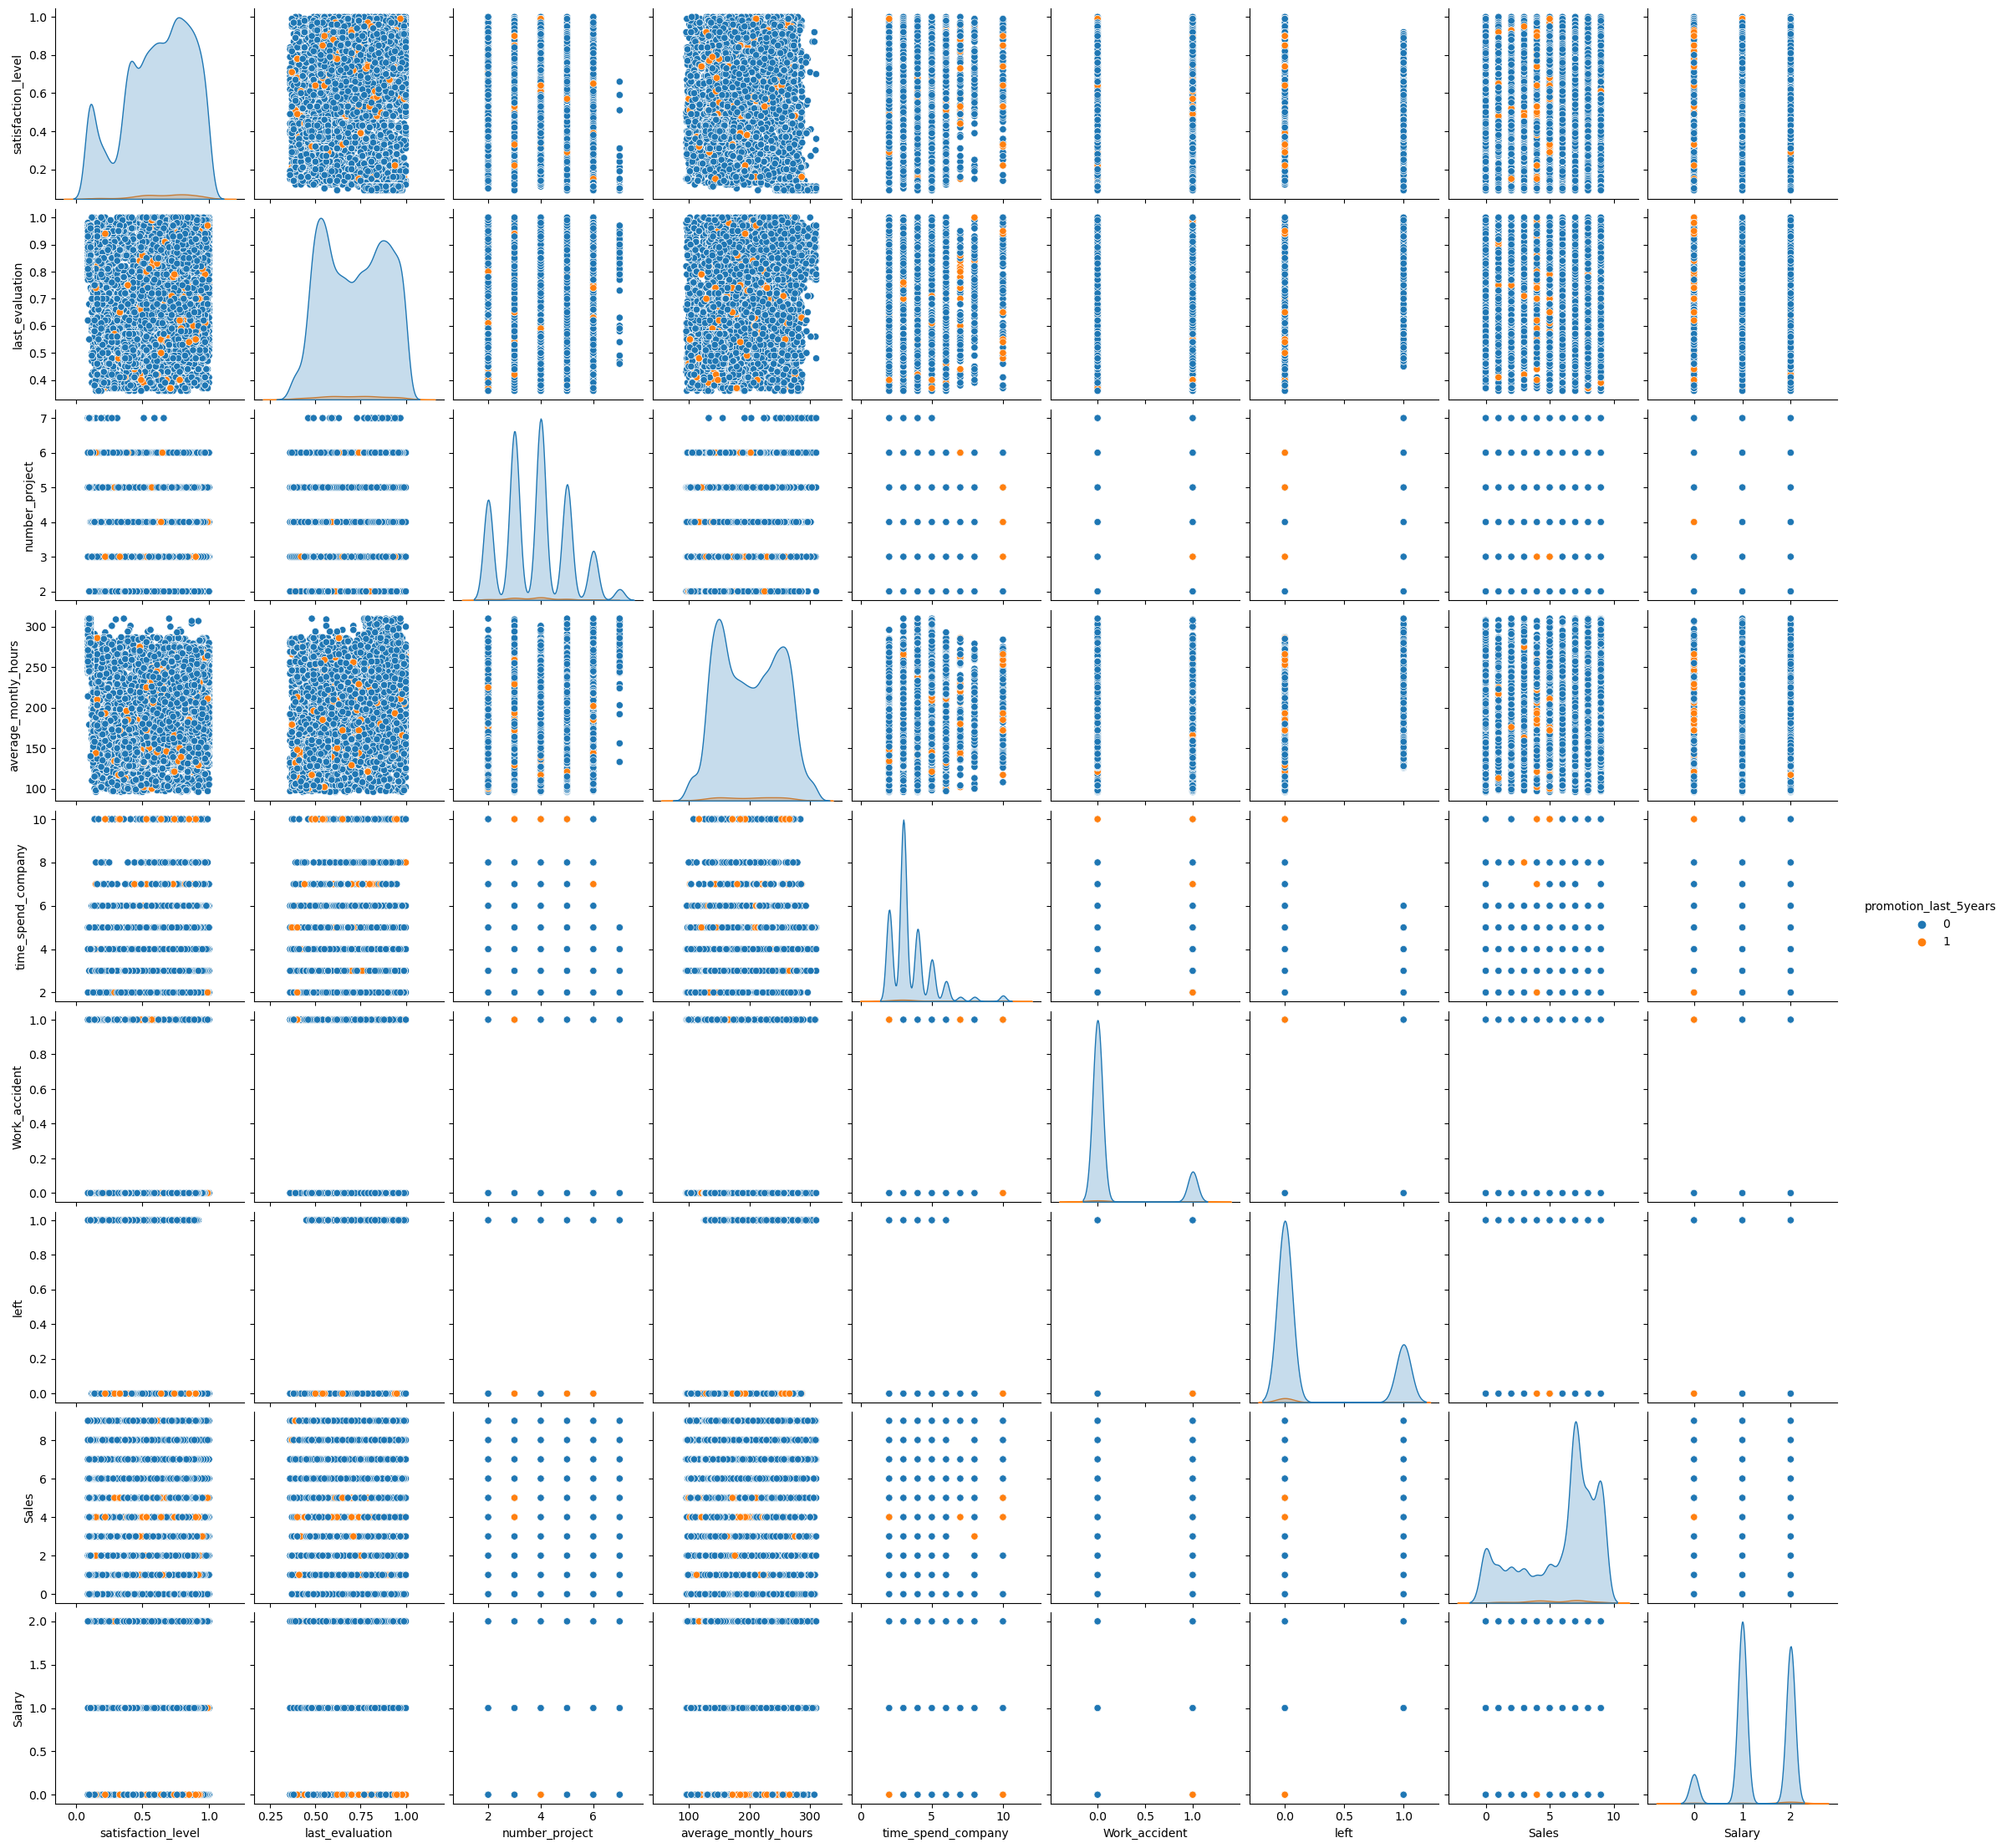

In [25]:
sns.pairplot(data,hue='promotion_last_5years')

# Naive Bayes model with HR dataset

In [26]:
x=data.iloc[:,:-1]
x.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales
0,0.38,0.53,2,157,3,0,1,0,7
1,0.80,0.86,5,262,6,0,1,0,7


In [27]:
y=data.iloc[:,-1:]
y.head(2)

,Salary
0,1
1,2


In [28]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2)

In [29]:
xtrain.shape

(11999, 9)

In [30]:
ytrain.shape

(11999, 1)

# GaussianNB Model

In [70]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training completed....')
print()
ypred_gauss=gauss_nb.predict(xtest)
print('Testing is done')

#cost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('Accuracy score: ',accuracy_score(ytest,ypred_gauss))
print()
print('='*60)
print('Confusion Matrix: \n',confusion_matrix(ytest,ypred_gauss))
print('='*60)
print()
print('Classification Matrix: \n',classification_report(ytest,ypred_gauss))
print('='*60)

Training completed....

Testing is done
Accuracy score:  0.49133333333333334

Confusion Matrix: 
 [[  31  206    9]
 [  41 1414   20]
 [  68 1182   29]]

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.22      0.13      0.16       246
           1       0.50      0.96      0.66      1475
           2       0.50      0.02      0.04      1279

    accuracy                           0.49      3000
   macro avg       0.41      0.37      0.29      3000
weighted avg       0.48      0.49      0.36      3000



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

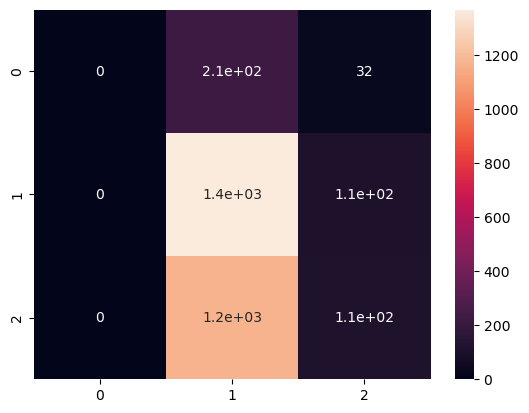

In [71]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [72]:
from sklearn.naive_bayes import MultinomialNB
multi_nb=MultinomialNB()
multi_nb.fit(xtrain,ytrain)
print('Training completed....')
print()
ypred_mul=multi_nb.predict(xtest)
print('Testing is done')

#cost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
accuracy_mul= accuracy_score(ytest,ypred_mul)
print('Accuracy score: ',accuracy_score(ytest,ypred_mul))
print()
print('='*60)
print()
print('Confusion Matrix: \n',confusion_matrix(ytest,ypred_mul))
print('='*60)
print()
print('Classification Matrix: \n',classification_report(ytest,ypred_mul))
print('='*60)

Training completed....

Testing is done
Accuracy score:  0.49466666666666664


Confusion Matrix: 
 [[   0  155   91]
 [   0 1158  317]
 [   0  953  326]]

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.51      0.79      0.62      1475
           2       0.44      0.25      0.32      1279

    accuracy                           0.49      3000
   macro avg       0.32      0.35      0.31      3000
weighted avg       0.44      0.49      0.44      3000



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: 

In [73]:
from sklearn.naive_bayes import BernoulliNB
ber_nb=BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training completed.....')
print()
ypred_ber=ber_nb.predict(xtest)
print('Testing is done')

#cost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('='*60)
accuracy_ber=accuracy_score(ytest,ypred_ber)
print('Accuracy score: ',accuracy_score(ytest,ypred_ber))
print()
print('='*60)
print()
print('Confusion Matrix: \n',confusion_matrix(ytest,ypred_ber))
print('='*60)
print()
print('Classification Matrix: \n',classification_report(ytest,ypred_ber))
print('='*60)

Training completed.....

Testing is done
Accuracy score:  0.49366666666666664


Confusion Matrix: 
 [[   0  214   32]
 [   0 1369  106]
 [   0 1167  112]]

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.50      0.93      0.65      1475
           2       0.45      0.09      0.15      1279

    accuracy                           0.49      3000
   macro avg       0.32      0.34      0.26      3000
weighted avg       0.44      0.49      0.38      3000



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: 

<Axes: >

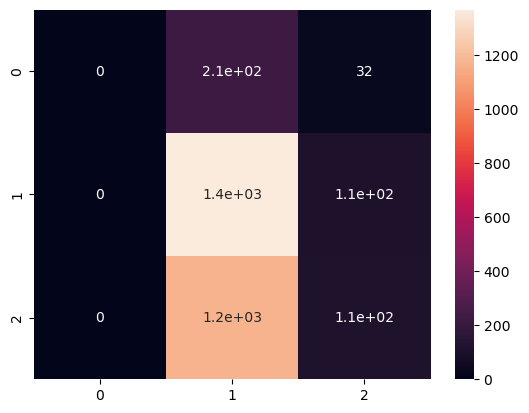

In [74]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [75]:
print(gauss_nb,accuracy_gauss)
print(multi_nb,accuracy_mul)
print(ber_nb,accuracy_ber)

GaussianNB() 0.49133333333333334
MultinomialNB() 0.49466666666666664
BernoulliNB() 0.49366666666666664


In [76]:
data.shape

(14999, 10)

# Ensemble Model

# 1.Bagging Classifier

In [77]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bagc= BaggingClassifier(base_estimator=gauss_nb, n_estimators=10 , random_state=1)#Instantiate Bagging classifier

bagc.fit(xtrain,ytrain)#train the model

#Test the model
ypred_bagc= bagc.predict(xtest)
print('*'*100)
print('Confusion matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy score:\n',accuracy_bagc)
print('-'*100)
print('ClassificationReport:\n', classification_report(ytest,ypred_bagc))

****************************************************************************************************
Confusion matrix:
 [[  31  206    9]
 [  41 1414   20]
 [  68 1178   33]]
----------------------------------------------------------------------------------------------------
Accuracy score:
 0.49266666666666664
----------------------------------------------------------------------------------------------------
ClassificationReport:
               precision    recall  f1-score   support

           0       0.22      0.13      0.16       246
           1       0.51      0.96      0.66      1475
           2       0.53      0.03      0.05      1279

    accuracy                           0.49      3000
   macro avg       0.42      0.37      0.29      3000
weighted avg       0.49      0.49      0.36      3000



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2.Random forest

In [78]:
#Bagging Classifier
from sklearn.ensemble import RandomForestClassifier
ran_for=RandomForestClassifier(n_estimators=10,random_state=2)
ran_for.fit(xtrain,ytrain)#train the model

#Test the model
ypred_rand= bagc.predict(xtest)
print('*'*100)
print('Confusion matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy score:\n',accuracy_rand)
print('-'*100)
print('ClassificationReport:\n', classification_report(ytest,ypred_rand))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21708\127151821.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for.fit(xtrain,ytrain)#train the model


****************************************************************************************************
Confusion matrix:
 [[  31  206    9]
 [  41 1414   20]
 [  68 1178   33]]
----------------------------------------------------------------------------------------------------
Accuracy score:
 0.49266666666666664
----------------------------------------------------------------------------------------------------
ClassificationReport:
               precision    recall  f1-score   support

           0       0.22      0.13      0.16       246
           1       0.51      0.96      0.66      1475
           2       0.53      0.03      0.05      1279

    accuracy                           0.49      3000
   macro avg       0.42      0.37      0.29      3000
weighted avg       0.49      0.49      0.36      3000



In [79]:
#Bagging Classifier
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier(n_estimators=10,random_state=2)
extra.fit(xtrain,ytrain)#train the model

#Test the model
ypred_extra= extra.predict(xtest)
print('*'*100)
print('Confusion matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy score:\n',accuracy_extra)
print('-'*100)
print('ClassificationReport:\n', classification_report(ytest,ypred_extra))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21708\111450896.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra.fit(xtrain,ytrain)#train the model


****************************************************************************************************
Confusion matrix:
 [[  84  103   59]
 [  35 1053  387]
 [  39  523  717]]
----------------------------------------------------------------------------------------------------
Accuracy score:
 0.618
----------------------------------------------------------------------------------------------------
ClassificationReport:
               precision    recall  f1-score   support

           0       0.53      0.34      0.42       246
           1       0.63      0.71      0.67      1475
           2       0.62      0.56      0.59      1279

    accuracy                           0.62      3000
   macro avg       0.59      0.54      0.56      3000
weighted avg       0.61      0.62      0.61      3000



In [83]:
scores=[('Gaussian_NB', accuracy_gauss)
      ,('Multinomial_NB',accuracy_mul),
      ('Bernoulli_B',accuracy_ber)
      ,('Bagging_class',accuracy_bagc)
      ,('Random_forest_class',accuracy_rand)
      ,('ExtraTree_class',accuracy_extra)]

Acc_scores = pd.DataFrame(scores,columns=['Model','Accuracy_scores'])
print(Acc_scores.sort_values(by='Accuracy_scores',ascending=False))

                 Model  Accuracy_scores
5      ExtraTree_class         0.618000
1       Multinomial_NB         0.494667
2          Bernoulli_B         0.493667
3        Bagging_class         0.492667
4  Random_forest_class         0.492667
0          Gaussian_NB         0.491333


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_B'),
  Text(3, 0, 'Bagging_class'),
  Text(4, 0, 'Random_forest_class'),
  Text(5, 0, 'ExtraTree_class')])

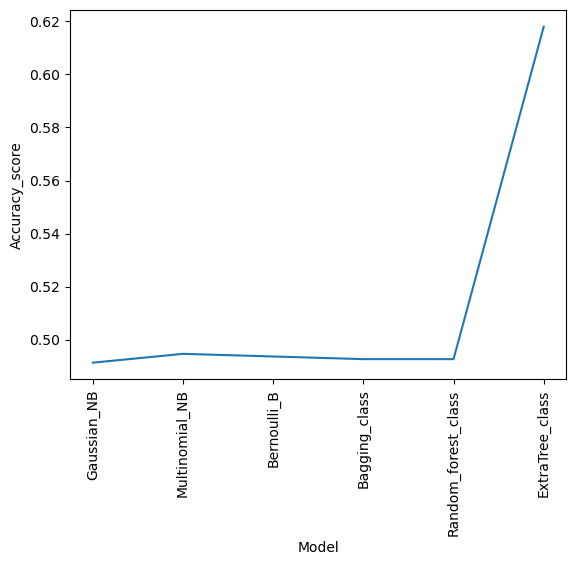

In [84]:
sns.lineplot(x=Acc_score['Model'],y=Acc_score['Accuracy_score'] , data=Acc_score)
plt.xticks(rotation=90)